In [62]:
# Importing preprocessed dataset
import pandas as pd
df = pd.read_csv('cleaned_data_more_features_filtered.csv')

In [64]:
#Separating features X from labels y
y = df['calories'].to_numpy()
X = df.drop(columns=['calories']).to_numpy()

In [66]:
# Scaling the data and dividing dataset into training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2)

In [68]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=10,min_samples_split=9)
DTR.fit(X_train, y_train)
DTR.score(X_test, y_test) #testing accuracy

0.9826318843894652

In [70]:
DTR.score(X_train, y_train) #training accuracy

0.9921620524643038

In [72]:

y_pred = DTR.predict(X_test)
y_pred

array([ 79.58258264, 536.34139434, 431.37230584, ..., 689.8560472 ,
        92.01824679, 319.92954315])

In [74]:
print(y_test)

[ 53.9 537.9 457.4 ... 725.3  76.2 339.1]


In [76]:
print(X)

[[  0  13   0 ...  55  11   7]
 [ 18   0  17 ...  30   9   6]
 [ 22  32  48 ... 130   6  13]
 ...
 [  6   2   3 ...  40   7   8]
 [ 11  57  11 ...  29   9  10]
 [ 14  33   4 ...  20   5   7]]


In [78]:
import numpy as np

# Creating a sample input
sample_input = np.array([22, 32, 48, 39, 27, 5, 130, 6, 13]) #This is the same as the third sample, so we're expecting something close to 269.8 calories

# Reshaping (1, num_features)
sample_input = sample_input.reshape(1, -1)

sample_input_scaled = scaler.transform(sample_input)  # Use the same scaler from training

# Making prediction
predicted_value = DTR.predict(sample_input_scaled)

print("Predicted Calories:", predicted_value)

Predicted Calories: [313.4045765]


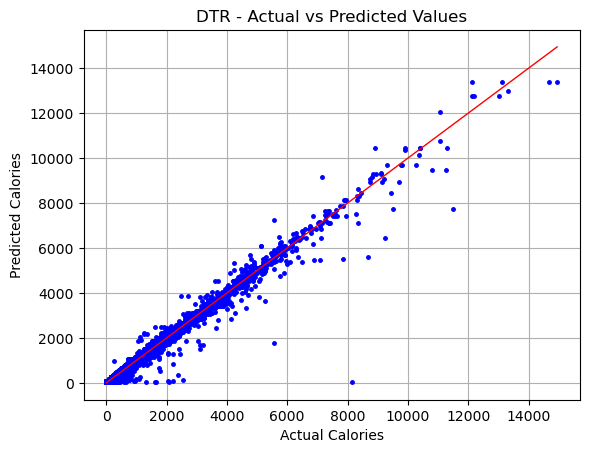

In [80]:
# Plotting predictions vs actual values
from matplotlib import pyplot as plt


#plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot(y_test, y_pred, color='b', marker=".", markersize=5, linewidth=0)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linewidth=1)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("DTR - Actual vs Predicted Values")
plt.grid(True)
plt.show()


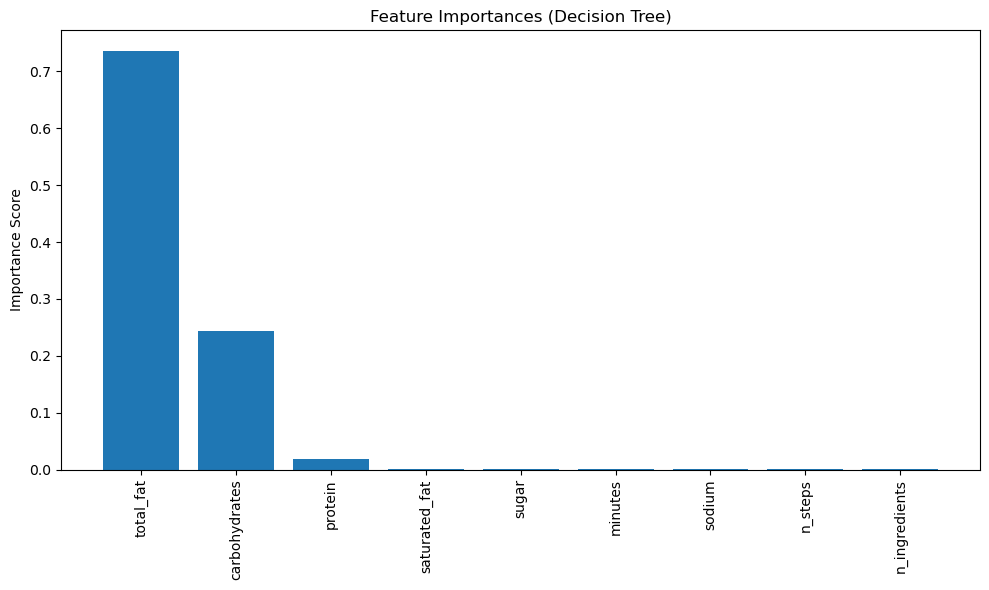

[7.35534377e-01 6.17698795e-04 4.23702239e-04 1.77937250e-02
 9.55703939e-04 2.44004735e-01 5.22005489e-04 9.70102329e-05
 5.10420383e-05]


In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Getting the feature names from the data
feature_names = df.drop(columns=['calories']).columns
importances = DTR.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
print(importances)


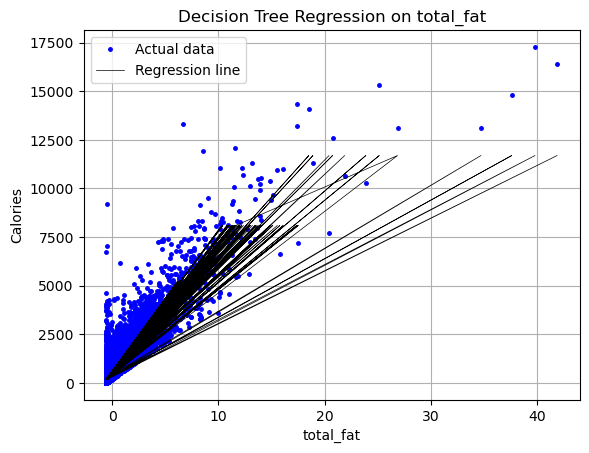

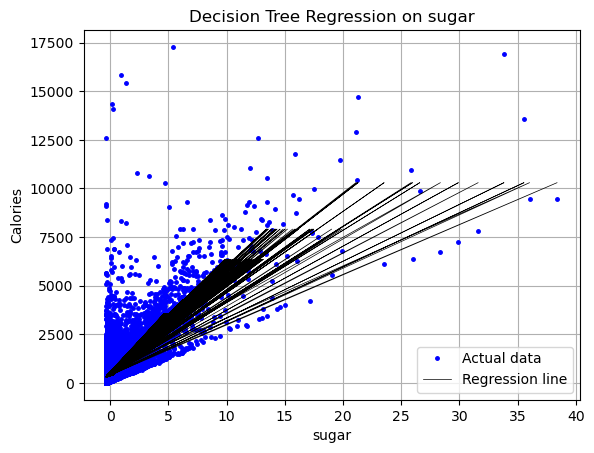

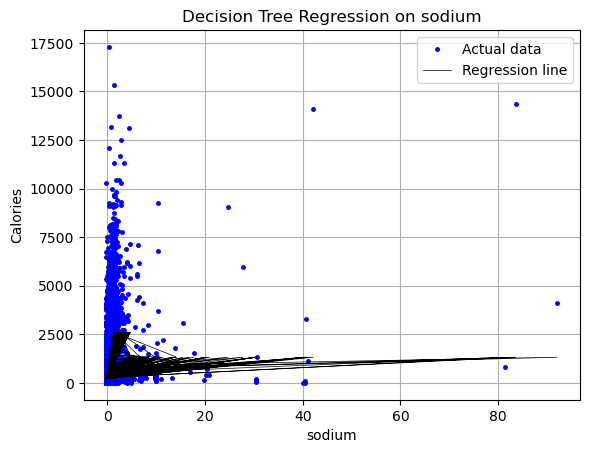

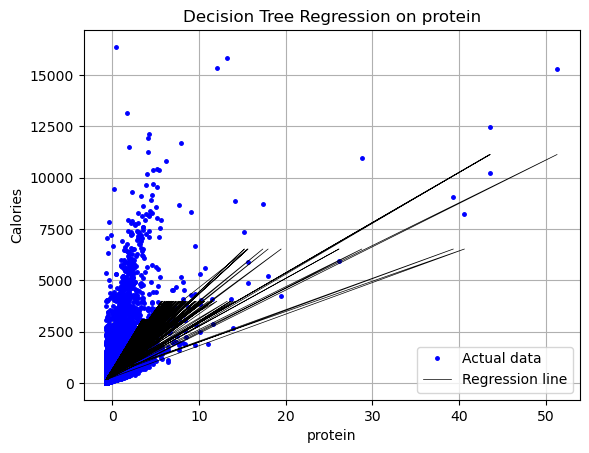

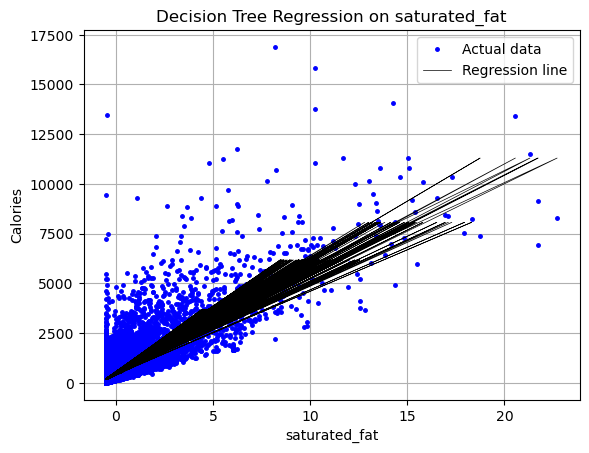

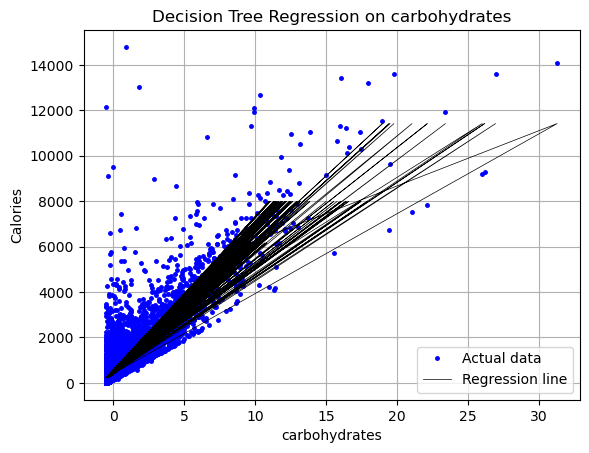

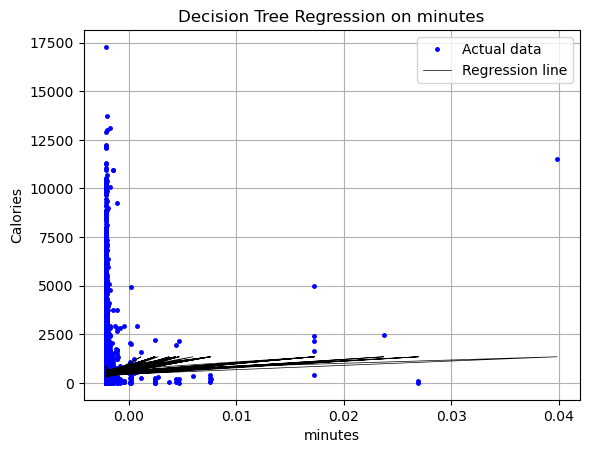

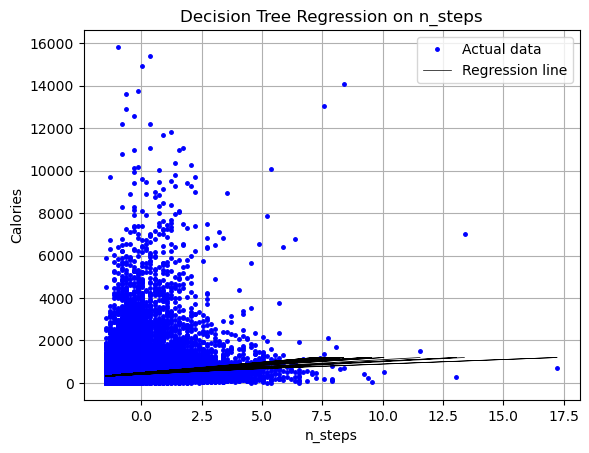

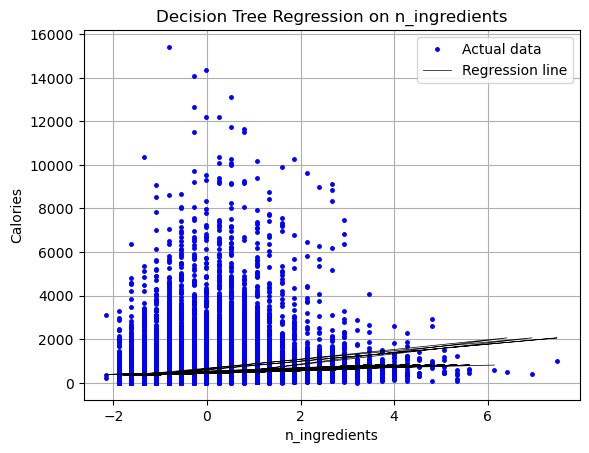

In [84]:
# Plotting linear regression between each nutrtional value and the calories
from matplotlib import pyplot as plt
for i in range(9):
    feature_index = i
    
    # Splitting using single feature
    X_single = X[:, feature_index].reshape(-1, 1)
    single_scaler = StandardScaler()
    X_single_scaled = single_scaler.fit_transform(X_single)
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single_scaled,y, test_size = 0.2)
    
    # Fitting model using only one feature
    DTR_single = DecisionTreeRegressor(max_depth = 4)
    DTR_single.fit(X_train_single, y_train_single)
    
    y_pred_single = DTR_single.predict(X_test_single)
    
    # Plotting the actual data points
    #plt.scatter(X_single, y, color='b', label="Actual data")
    plt.plot(X_test_single, y_test_single, color='b', marker=".", markersize=5, linewidth=0, label="Actual data")    
    # Plotting the regression line
    plt.plot(X_test_single, y_pred_single, color='k', linewidth=0.5, label="Regression line")

    # Getting the feature names from the data
    feature_name = feature_names[feature_index]
    
    plt.xlabel(feature_name)
    plt.ylabel("Calories")
    plt.legend()
    plt.title(f"Decision Tree Regression on {feature_name}")
    plt.grid(True)
    plt.show()

Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
  
print("MAE:", mae) 
print("MAPE:", mape)
print("MSE:", mse) 
print("RMSE:", rmse)
print("r2:", r2)

In [88]:

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
  
print("MAE:", mae) 
print("MAPE:", mape)
print("MSE:", mse) 
print("RMSE:", rmse)
print("r2:", r2)

MAE: 35.70206226556372
MAPE: 40551885496966.87
MSE: 7953.99341104932
RMSE: 89.18516362629671
r2: 0.9826318843894652


In [14]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DTR, X, y, cv=5) #X and y will be split into folds
(scores)

array([0.98203807, 0.98389685, 0.98452054, 0.97639971, 0.97811564])

In [90]:
from sklearn.feature_selection import SelectKBest, f_regression
df = pd.read_csv('cleaned_data_more_features_filtered.csv')
y = df['calories'].to_numpy()
X = df.drop(columns=['calories'])

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
top_features = X.columns[selector.get_support()]
print("\nTop 5 Selected Features:", list(top_features))

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_selected, y, test_size=0.2)


Top 5 Selected Features: ['total_fat', 'sugar', 'protein', 'saturated_fat', 'carbohydrates']


In [94]:
r2_fs, mae_fs, rmse_fs = [], [], []

print("\nTop 5 Features")
model = DecisionTreeRegressor(max_depth=10,min_samples_split=9)
model.fit(X_train_fs, y_train_fs)
y_pred = model.predict(X_test_fs)

r2_fs.append(r2_score(y_test_fs, y_pred))
mae_fs.append(mean_absolute_error(y_test_fs, y_pred))
rmse_fs.append(np.sqrt(mean_squared_error(y_test_fs, y_pred)))


print(f"  R² = {r2_fs[-1]:.6f}, MAE = {mae_fs[-1]:.2f}, RMSE = {rmse_fs[-1]:.2f}")


Top 5 Features
  R² = 0.982127, MAE = 35.40, RMSE = 91.09


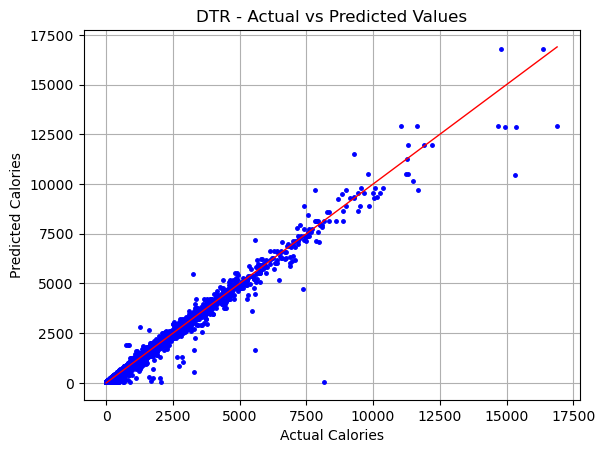

In [96]:
plt.plot(y_test_fs, y_pred, color='b', marker=".", markersize=5, linewidth=0)
plt.plot([y_test_fs.min(), y_test_fs.max()], [y_test_fs.min(), y_test_fs.max()], color='r', linewidth=1)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("DTR - Actual vs Predicted Values")
plt.grid(True)
plt.show()


In [15]:
from sklearn.model_selection import cross_validate #more comprehensive: gives time, can show training scores, can show results for multiple metrics
scores = cross_validate(DTR, X, y, cv=5, return_train_score= True, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_squared_error')) #X and y will be split into folds
print(scores)

{'fit_time': array([1.30464292, 1.32242632, 1.36726332, 1.40491009, 1.44143486]), 'score_time': array([0.01172733, 0.01444101, 0.01413202, 0.0153935 , 0.01281404]), 'test_r2': array([0.9832834 , 0.98512904, 0.98365769, 0.98190304, 0.9799234 ]), 'train_r2': array([0.9981774 , 0.99850036, 0.9982946 , 0.99806638, 0.99830221]), 'test_neg_root_mean_squared_error': array([-88.5572533 , -86.02717393, -86.27269513, -94.85400373,
       -89.82026483]), 'train_neg_root_mean_squared_error': array([-29.05747444, -26.15641671, -28.21317577, -29.70307924,
       -28.54619183]), 'test_neg_mean_absolute_error': array([-23.61395116, -23.2424091 , -23.40253677, -24.03381692,
       -22.67015143]), 'train_neg_mean_absolute_error': array([-12.957129  , -13.0408737 , -12.90627313, -13.00458628,
       -12.78806266]), 'test_neg_mean_squared_error': array([-7842.38711222, -7400.67465467, -7442.97792526, -8997.28202358,
       -8067.67997347]), 'train_neg_mean_squared_error': array([-844.33682108, -684.158135

In [16]:
scores_df = pd.DataFrame(scores)
summary_df = scores_df.mean().to_frame(name="Mean")
summary_df["Std Dev"] = scores_df.std()
print(summary_df)

                                          Mean     Std Dev
fit_time                              1.368135    0.056671
score_time                            0.013702    0.001439
test_r2                               0.982779    0.001967
train_r2                              0.998268    0.000162
test_neg_root_mean_squared_error    -89.106278    3.583212
train_neg_root_mean_squared_error   -28.335268    1.341574
test_neg_mean_absolute_error        -23.392573    0.501184
train_neg_mean_absolute_error       -12.939385    0.098566
test_neg_mean_squared_error       -7950.200338  648.278155
train_neg_mean_squared_error       -804.327246   74.662571


In [17]:
#from sklearn import tree
#tree.plot_tree(DTR)

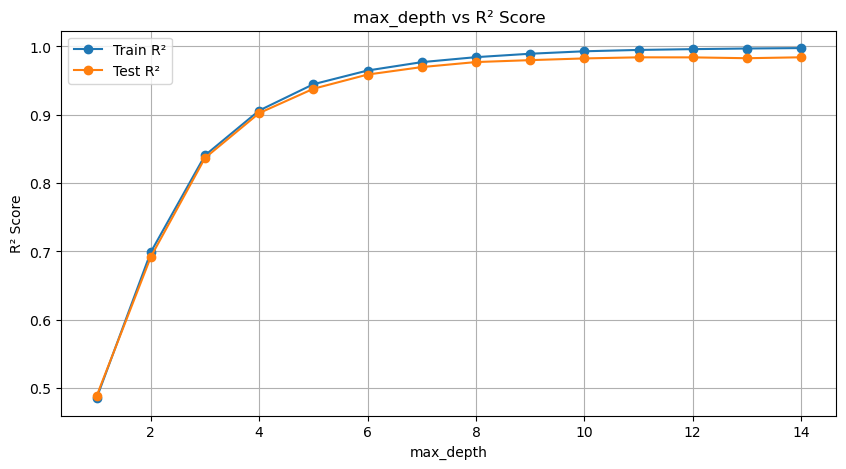

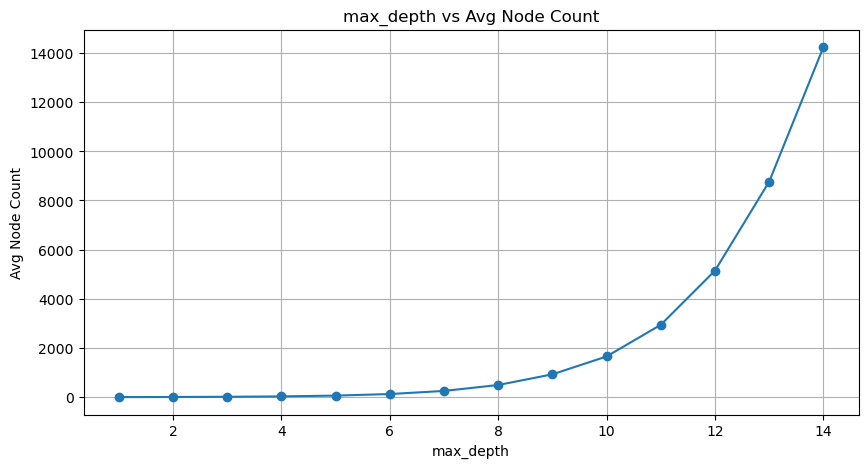

In [22]:
# Hold-out Method (Repetitive Random Splitting) with hyper-parameter tuning (for Regression)

# Tune based on max_depth
max_depths = range(1, 15)
avg_training_accuracies = []
avg_testing_accuracies = []
avg_node_counts = []

for depth in max_depths:
    training_accuracies = []
    testing_accuracies = []
    node_counts = []
    
    for _ in range(10):  # loop 10 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(X_train, y_train)
        
        training_accuracies.append(model.score(X_train, y_train))
        testing_accuracies.append(model.score(X_test, y_test))
        node_counts.append(model.tree_.node_count)
    
    avg_training_accuracies.append(np.mean(training_accuracies))
    avg_testing_accuracies.append(np.mean(testing_accuracies))
    avg_node_counts.append(np.mean(node_counts))

# Plotting max_depth vs accuracies
plt.figure(figsize=(10, 5))
plt.plot(max_depths, avg_training_accuracies, label='Train R²', marker='o')
plt.plot(max_depths, avg_testing_accuracies, label='Test R²', marker='o')
plt.xlabel('max_depth')
plt.ylabel('R² Score')
plt.title('max_depth vs R² Score')
plt.grid(True)
plt.legend()
plt.show()

# Plotting max_depth vs avg_node_count
plt.figure(figsize=(10, 5))
plt.plot(max_depths, avg_node_counts, label='Avg Node Count', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Avg Node Count')
plt.title('max_depth vs Avg Node Count')
plt.grid(True)
plt.show()


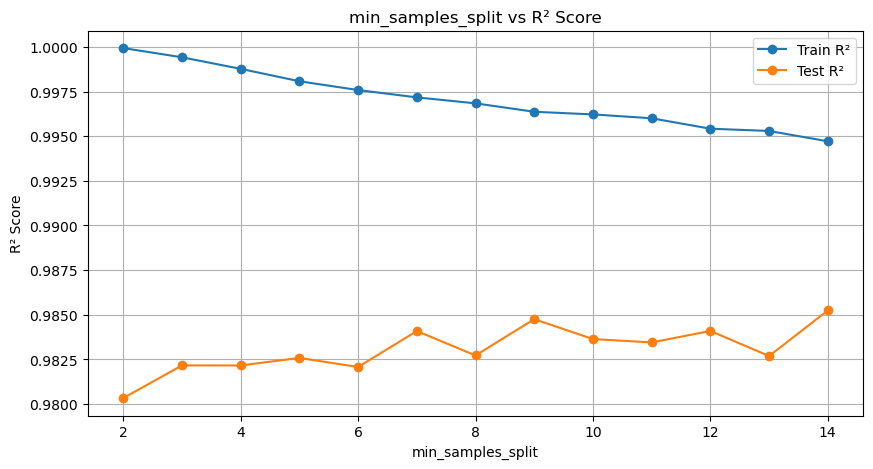

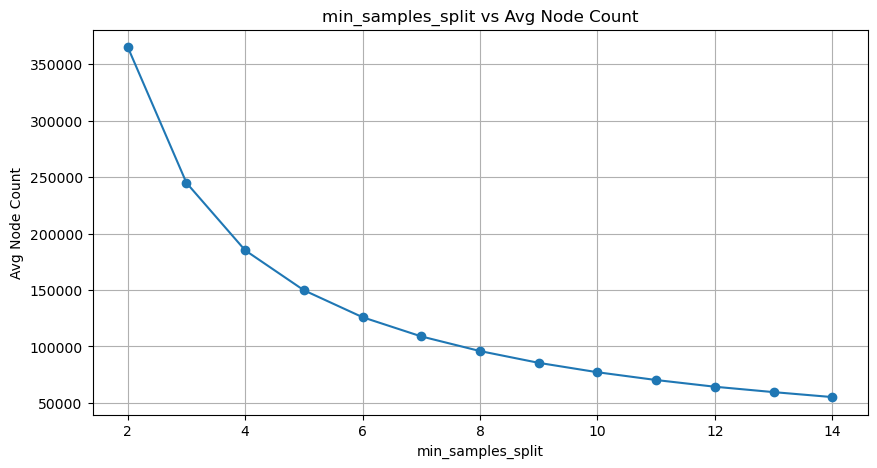

In [24]:
# Tune based on min_samples_split
min_splits = range(2, 15)
avg_training_accuracies = []
avg_testing_accuracies = []
avg_node_counts = []

for split in min_splits:
    training_accuracies = []
    testing_accuracies = []
    node_counts = []
    
    for _ in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        model = DecisionTreeRegressor(min_samples_split=split)
        model.fit(X_train, y_train)
        
        training_accuracies.append(model.score(X_train, y_train))
        testing_accuracies.append(model.score(X_test, y_test))
        node_counts.append(model.tree_.node_count)
    
    avg_training_accuracies.append(np.mean(training_accuracies))
    avg_testing_accuracies.append(np.mean(testing_accuracies))
    avg_node_counts.append(np.mean(node_counts))

# Plotting min_samples_split vs accuracies
plt.figure(figsize=(10, 5))
plt.plot(min_splits, avg_training_accuracies, label='Train R²', marker='o')
plt.plot(min_splits, avg_testing_accuracies, label='Test R²', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('R² Score')
plt.title('min_samples_split vs R² Score')
plt.grid(True)
plt.legend()
plt.show()

# Plotting min_samples_split vs avg_node_count
plt.figure(figsize=(10, 5))
plt.plot(min_splits, avg_node_counts, label='Avg Node Count', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Avg Node Count')
plt.title('min_samples_split vs Avg Node Count')
plt.grid(True)
plt.show()


In [34]:
from tqdm import tqdm
# Tune based on ccp_alpha
alphas = np.arange(0, 0.1, 0.01)
avg_training_accuracies = []
avg_testing_accuracies = []
avg_node_counts = []

for alpha in alphas:
    training_accuracies = []
    testing_accuracies = []
    node_counts = []
    
    for _ in tqdm(range(1)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        model = DecisionTreeRegressor(ccp_alpha=alpha)
        model.fit(X_train, y_train)
        
        training_accuracies.append(model.score(X_train, y_train))
        testing_accuracies.append(model.score(X_test, y_test))
        node_counts.append(model.tree_.node_count)
    
    avg_training_accuracies.append(np.mean(training_accuracies))
    avg_testing_accuracies.append(np.mean(testing_accuracies))
    avg_node_counts.append(np.mean(node_counts))

# Plotting ccp_alpha vs accuracies
plt.figure(figsize=(10, 5))
plt.plot(alphas, avg_training_accuracies, label='Train R²', marker='o')
plt.plot(alphas, avg_testing_accuracies, label='Test R²', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('R² Score')
plt.title('ccp_alpha vs R² Score')
plt.grid(True)
plt.legend()
plt.show()

# Plotting ccp_alpha vs avg_node_count
plt.figure(figsize=(10, 5))
plt.plot(alphas, avg_node_counts, label='Avg Node Count', marker='o')
plt.xlabel('ccp_alpha')
plt.ylabel('Avg Node Count')
plt.title('ccp_alpha vs Avg Node Count')
plt.grid(True)
plt.show()


  0%|                                                                                            | 0/1 [03:51<?, ?it/s]


KeyboardInterrupt: 